# The Central Limit Theorm

### Data Science 410


## Introduction

The **Central Limit Theorm** is a fundamental relationship which underpins many of the principles on which statistical methods are built. Put another way, without the Central Limit Theorm, much of what we do rountinely in statistics would simply not work. Specifically:

- CLT enables sampling methods,
- Without a CLT we could not reliably compute confidence intervals,
- Most statistical methods and machine learning algorithms rely on CLT. 



## History

The CLT has been around in many forms and refined for over two centuries. The first published version was by de Moiver in 1738. He proved a special case for Bernoulli trials.

<img src="img/deMoiver.jpg" alt="Drawing" style="width:225px; height:300px"/>
<center>de Moiver's book of 1738</center>

Laplace published generalization of the CLT in 1776, 1785 and 1820. A rigorous proof, close to the modern form, was published by Chebyshev in 1887. Feller and Lévy worked on genralizations and some special cases into the mid 1930s. Any theorm that would attract the attention of so many methameticians over so long a period of time must be important!


## The Central Limit Theorem

We will not go into detail on the derivation or proofs of the Central Limit Theorem (CLT). We will concentrate on the concepts. 

The key idea is that if we sample a population many times, and the distribution of mean of all samples is normally distributed, regardless of the population distribution. More formally, in a simple yet general form we can write the CLT as:

$$\bar{X} = population\ mean = \mu$$

$$distribution(\bar{X})  \rightarrow  N(\mu, \frac{\sigma}{\sqrt{n}})$$

## A First Example

Let's try an example. You will create and sample a distribution that is a **mixture of Normals**. By the CLT the distribution of the mean of the sample should be Normal, despite the original distribution.

### Generate mixture of Normals

The code in the cell below computes 2000 realizations of a distribution from a mixture of Normal distributions. Run the code and examine the kernel density estimation plot.

In [1]:
import pandas
import numpy
import numpy.random as nr
from matplotlib import pyplot
import seaborn as sns
import seaborn
import statsmodels.api as sm
import scipy

%matplotlib inline

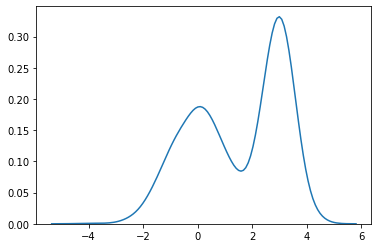

In [2]:
x = numpy.concatenate([
        numpy.random.normal(loc=0, scale=1, size=1000),
        numpy.random.normal(loc=3, scale=.5, size=1000)])
seaborn.kdeplot(x)

## Sample the distribution and examine means

The code in the cell below computes a list of 500 sample means from samples of size 50 from the population distribution. A histogram and Q-Q plot are created from the results are plotted. Run this code and examine the results.

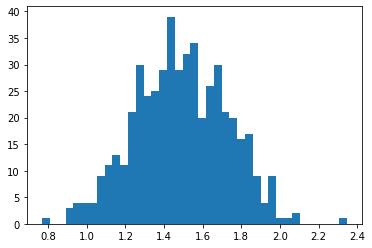

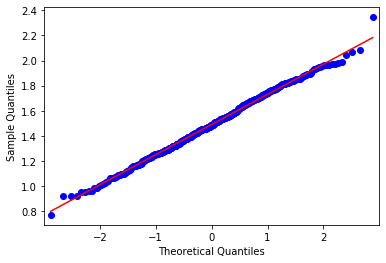

In [3]:
x_means = numpy.array([
        numpy.random.choice(x, size=50, replace=True).mean()
        for i in range(500)])

breaks = numpy.linspace(x_means.min(), x_means.max(), num=40)
_ = pyplot.hist(x_means, bins=breaks)
_ = sm.qqplot(x_means, line='s')

The distribution of the sample means is close to Normal, even though the population is far from Normal. This demonstrates a result consistent with the CLT. 

### Compute summary statistics

Next, run the code in the cell below to compute some summary statistics and examine the result. 

In [4]:
pop_mean = x_means.mean()
pop_std = x_means.std()
print('Estimated mean (%.3f) vs actual mean (%.3f)' % (pop_mean, x.mean()))
print('Estimated se. (%.3f)' % pop_std)

Estimated mean (1.490) vs actual mean (1.488)
Estimated se. (0.240)


## Confidence Intervals

To create confidence intervals for population means, we use the central limit theorem and create confidence intervals based on the normal distribution.
- Repeatedly sample from the population.
- Calculate the mean for each sample.
- Use the average of the sample means as the population estimate and create a C.I. based on the s.d. of the sample means.

The concept of confidence intervals is illustrated in the figure below. If this is the distribution of a mean estimate, we can use the confidence intervals at the different levels to determine the range of possible values within some confidence. For example, if we say the we have 95% confidence that the true mean estimate lies within the +/-2 standard deviation range of this distribution.  

![](img/CIs.png)

Confidence intervals are a way to express uncertainty in population parameters, as estimated by the sample. However, it is **not correct to say:**
- “95% of the sample values are in this range.”
- “There is a 95% chance that the mean of another 
     sample will be in this range.”

Run the code in the cell below to 

In [5]:
alpha = 0.95
half_width = scipy.stats.norm.ppf((1 + alpha)/2, loc=pop_mean, scale=pop_std) - pop_mean
print('The half width is %.2f' % half_width)

ci_low = pop_mean - half_width
ci_high = pop_mean + half_width

print('The actual mean is %.2f' % x.mean())
print('The %.2f level CI is (%.2f , %.2f)' % (alpha, ci_low, ci_high))

The half width is 0.47
The actual mean is 1.49
The 0.95 level CI is (1.02 , 1.96)


## Your Turn

The code in the cell below computes a population from a uniform distribution. Execute this code and examine the density plot.

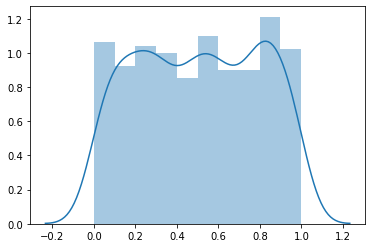

In [7]:
uniform_sample = numpy.random.uniform(size=1000)
sns.distplot(uniform_sample)

In the cell below create code to compute means of the uniform distribution, using 500 samples of size 50. Plot the histogram and Q-Q Normal plots of these means. Run your code several times and notice any changes in the distribution of the means.

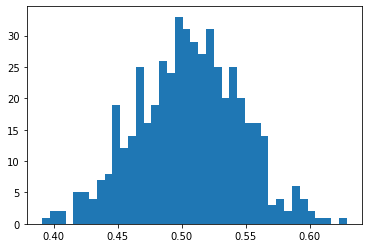

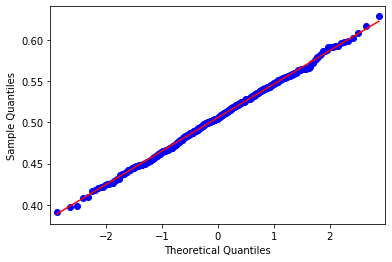

In [8]:
x_means = numpy.array([
        numpy.random.choice(uniform_sample, size=50, replace=True).mean()
        for i in range(500)])

breaks = numpy.linspace(x_means.min(), x_means.max(), num=40)
_ = pyplot.hist(x_means, bins=breaks)
_ = sm.qqplot(x_means, line='s')

#### Copyright 2017 Stephen Elston. All rights reserved.